* 텐서플로우로 분류 모델 만들기
* [첫 번째 신경망 훈련하기: 기초적인 분류 문제  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/classification)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df.shape

(303, 14)

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


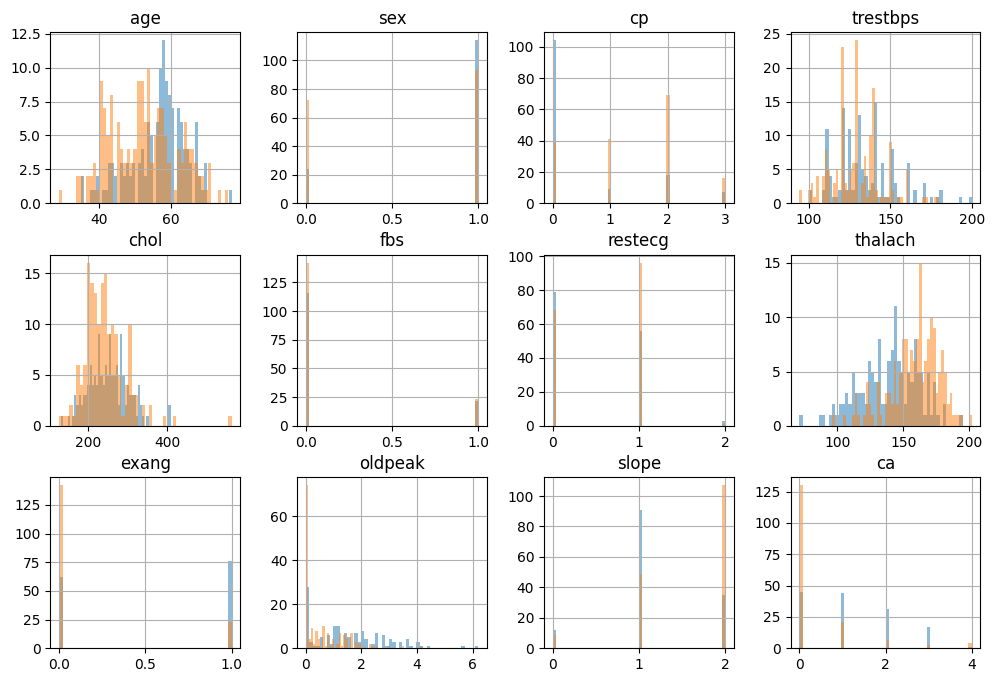

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))
df[df["target"] == 0].drop(columns="target").iloc[:, :12].hist(bins=50, alpha=.5, ax=axes)
df[df["target"] == 1].drop(columns="target").iloc[:, :12].hist(bins=50, alpha=.5, ax=axes)
plt.show()

In [5]:
X = df.drop(columns="target")
y = df["target"]

In [6]:
# 학습세트와 예측세트를 분리합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

<img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="40%">

* 이미지 출처 : https://cs231n.github.io/neural-networks-1/


<img src="https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/1layer.gif" width="300">

* 이미지 출처 : https://colah.github.io/posts/2014-03-NN-Manifolds-Topology/

In [7]:
input_shape = X_train.shape[1]
input_shape

13

In [8]:
import tensorflow as tf
seed = 42
tf.random.set_seed(seed)

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(input_shape)),
  tf.keras.layers.Dense(256, activation='swish'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='swish'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid') 
])

2023-09-23 23:34:56.687020: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 36,609
Trainable params: 36,609
Non-trainable params: 0
_________________________________________________________________


## 학습

<img src="https://numpy.org/numpy-tutorials/_images/tutorial-deep-learning-on-mnist.png">

In [11]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(X_train, y_train, 
          epochs=100,
          use_multiprocessing=True,
          callbacks=[early_stop],
          verbose=0)

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,epoch
42,0.724608,0.546256,42
43,0.664304,0.572687,43
44,0.666181,0.599119,44
45,0.702632,0.519824,45
46,0.665126,0.621145,46


## 예측

In [13]:
y_pred = model.predict(X_test)
y_pred[0]

3/3 [==============================] - 0s 1ms/step


array([0.42447168], dtype=float32)

## 평가

In [14]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

3/3 - 0s - loss: 0.6069 - accuracy: 0.6579 - 113ms/epoch - 38ms/step

테스트 정확도: 0.6578947305679321


In [15]:
y_predict = (y_pred.flatten() > 0.5).astype(int)
y_predict

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Accuracy 

In [16]:
(y_test == y_predict).mean()

0.6578947368421053

In [17]:
pd.crosstab(y_test, y_predict)

col_0,0,1
target,,
0,11,24
1,2,39


In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.31      0.46        35
           1       0.62      0.95      0.75        41

    accuracy                           0.66        76
   macro avg       0.73      0.63      0.60        76
weighted avg       0.72      0.66      0.62        76



In [21]:
from sklearn.metrics import class_likelihood_ratios

class_likelihood_ratios(y_test, y_predict)

(1.3871951219512195, 0.15521064301552107)